In [1]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
# Step 2: Load the dataset manually into a DataFrame
data = pd.read_csv(r"E:\3rd year\AI & ML\Decision_Treee.csv")

In [3]:
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [5]:
# Step 3: Convert categorical columns to numerical values using Label Encoding
# Since DecisionTreeClassifier requires numerical input
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

In [6]:
data

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [7]:
# Step 4: Split features (X) and target (y)
X = data.drop('play', axis=1)  # All columns except 'play'
y = data['play']               # Target column


In [8]:
X

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [9]:
# Step 5: Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
# Step 6: Create and train the Decision Tree model
model = DecisionTreeClassifier(criterion='entropy')  # or use 'gini'
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [11]:
# Step 7: Make predictions on the test set
y_pred = model.predict(X_test)


In [12]:
# Step 8: Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6666666666666666


In [13]:
from sklearn.tree import export_text

# Print the structure of the decision tree
tree_rules = export_text(model, feature_names=list(X.columns))
print(tree_rules)


|--- outlook <= 0.50
|   |--- class: 1
|--- outlook >  0.50
|   |--- humidity <= 0.50
|   |   |--- class: 0
|   |--- humidity >  0.50
|   |   |--- windy <= 0.50
|   |   |   |--- class: 1
|   |   |--- windy >  0.50
|   |   |   |--- temp <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- temp >  1.00
|   |   |   |   |--- class: 1



from sklearn import tree

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
tree.plot_tree(classifier, feature_names=['outlook', 'temp', 'humidity', 'windy'],
               class_names=['no', 'yes'], filled=True)
plt.show()


NameError: name 'classifier' is not defined

<Figure size 1200x600 with 0 Axes>

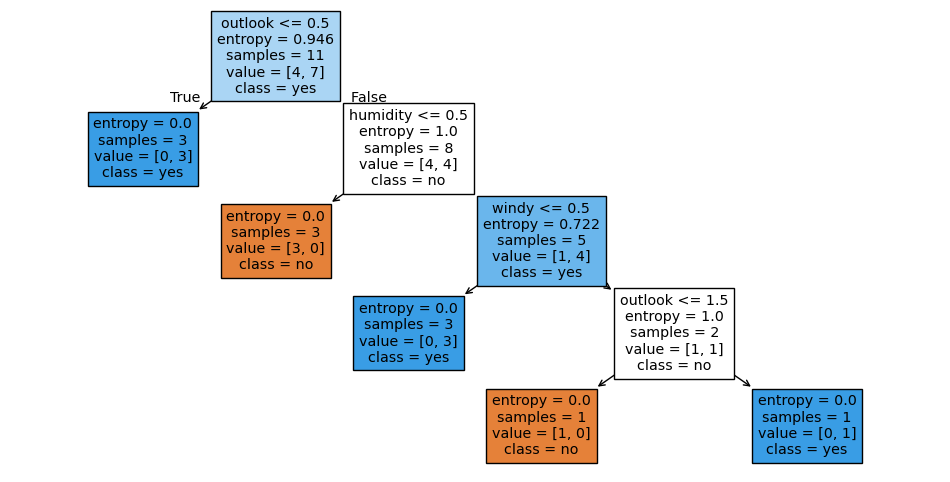

In [20]:
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
tree.plot_tree(classifier, feature_names=['outlook', 'temp', 'humidity', 'windy'],
               class_names=['no', 'yes'], filled=True)
plt.show()
